In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [16]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [17]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)


In [6]:
# Try different values of K and store accuracy
k_values = range(1, 11)
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

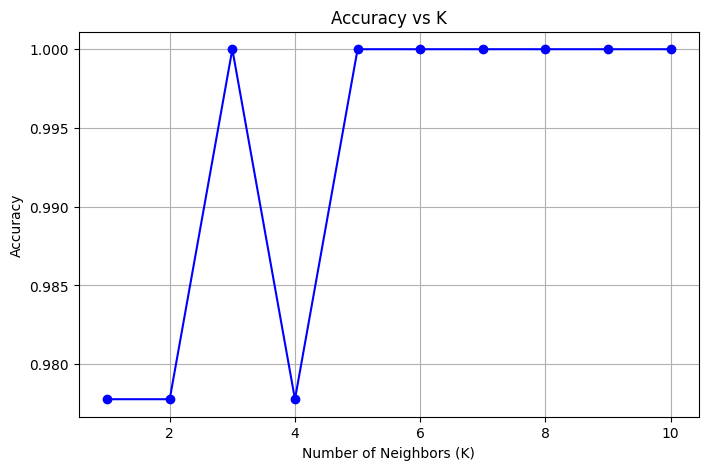

In [7]:
# Plot K values vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o', color='blue')
plt.title('Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [8]:
# Choose best K and fit model again
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Best K: {best_k} with Accuracy: {max(accuracy_scores):.2f}")

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)

Best K: 3 with Accuracy: 1.00


In [10]:
# Evaluate final model
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"\nFinal Accuracy with K={best_k}: {final_accuracy:.2f}")



Final Accuracy with K=3: 1.00


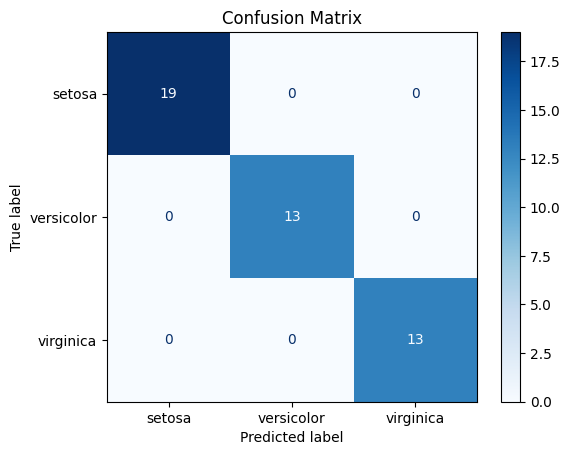

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, final_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Decision boundary visualization (using only 2 features)
X_vis = X[:, :2]  # only first 2 features for 2D visualization
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Create meshgrid
h = 0.02
x_min, x_max = X_vis_norm[:, 0].min() - 1, X_vis_norm[:, 0].max() + 1
y_min, y_max = X_vis_norm[:, 1].min() - 1, X_vis_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

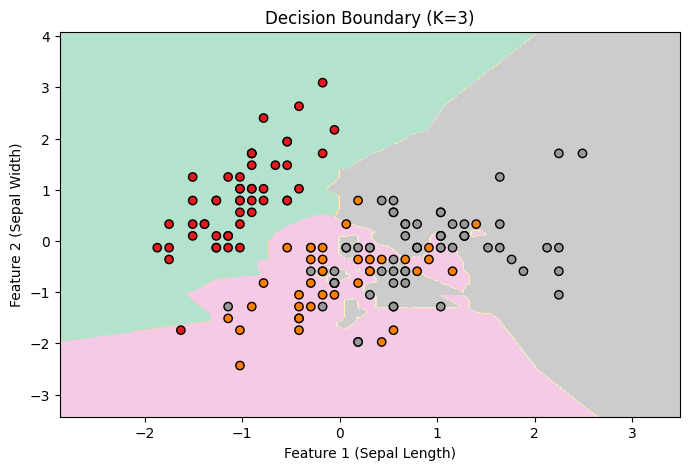

In [21]:
# Plot decision boundaries
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(X_vis_norm[:, 0], X_vis_norm[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title(f"Decision Boundary (K={best_k})")
plt.xlabel("Feature 1 (Sepal Length)")
plt.ylabel("Feature 2 (Sepal Width)")
plt.show()